In [1]:
using Plots
using DataFrames

# Ejercicio 4:
Sean dos sólidos de Einstein, con $N_{A}=300, N_{B}=200$ osciladores; $y$ un nümero de paquetes de energia $q_{\text {tot }}=100$ para distribuir entre los dos sólidos.

a) Genera una sola tabla de datos que contenga los paquetes de energia del sólido $A, q_{A ;}$ la multiplicidad $\Omega_{A}$ i la entropia normalizada, $S_{A} / k ;$ y el inverso de la temperatura, $d S_{A} / d\left(U_{a}\right)$, con $U_{a}=\epsilon_{0} q_{A}$ la energia del sistema $A$ y $c_{0}$ una constante. Haz lo mismo para el sólido $B$, con la $q_{B}$ correspondiente a cada $q_{A}$ tal que $q_{A}+q_{B}=q_{\text {tor }}$ (en la misma tabla, como se hizo en clase). Una vez hecho eso, agrega los valores para el sistema $A+B$ de multiplicidad total, $\Omega_{\text {total }} y$ de entropia total normalizada, $S_{\text {roral }} / k . \backslash$ Nota: No es necesario escribir los datos para TODAS las $q_{A}$ 's posibles, pero si para $q_{i}$ 's cercanas a cero, cercanas a 100, y en intermedios interesantes.

b) Determina la entropia total para la cual las temperaturas inversas de $A$ y $B$ son las más cercanas entre si.

c) Grafica $S_{\text {totat }}, S_{A}$ y $S_{B}$ vs. $q_{A}$ (en una msma grafica para poder comparar entre si).

## a)

Sabemos que podemos aproximar la multiplicidad de un sólido de Einstein con un número grande de átomos por lo siguiente:
$$
\Omega \approx \frac{(q+N) !}{q^{\prime} N !}
$$

Recordamos ahora que la entropía está definida como:

$$
S=k_{b} \ln (\Omega)
$$
Por otro lado, en clase vimos que:
$$
\ln (\Omega) \approx(N+q) \ln (N+q)-q \ln (q)-N \ln (N)
$$

$$
\Rightarrow \frac{d \ln  \Omega}{d q}=\ln (q+n)-\ln (q)
$$
Y por lo tanto:
$$
\frac{1}{T}=\frac{k_{b}}{\epsilon} \frac{d \ln (\Omega)}{d q}
$$

A continuación programaremos estas funciones:

In [14]:
function multiplicidad(q,N)
    Ω = factorial(big(q+N-1))/(factorial(big(q))*factorial(big(N-1)))
    return Ω
end

function entropia_norma(Ω)
    #regresa la entropía normalizada
    return log(Ω)
end

function temperatura(q,N)
    #esta función va a regresar 1/T, pero por simplicidad al programar lo ponemos como T
    K_b=1
    ϵ=1
    T=(K_b/ϵ)*(log(N+q)-log(q))
    return T
end

temperatura (generic function with 1 method)

Y utilizando estas funciones construimos la tabla:

In [17]:
#Valores del sistema A
qA=collect(0:1:100) #número de cuantos 
ΩA=multiplicidad.(qA,300)
SA=entropia.(ΩA)
TA=temperatura.(qA,300) #1/TA

#Valores del sistema B 
qB=100 .-qA #número de quantos 
ΩB=multiplicidad.(qB,200)
SB=entropia.(ΩB)
TB=temperatura.(qB,200) #1/TB

#Valores totales
Ω_total=ΩA.*ΩB
S_total=SA.+SB

#Tabla
tabla=DataFrame(qA=qA,ΩA=ΩA,EntropiaA=SA,TA_inv=TA,qB=qB,ΩB=ΩB,EntropiaB=SB,TB_inv=TB,Ω_total=Ω_total,S_total=S_total)
show(tabla,allcols=true,allrows=true)

101×10 DataFrame
│ Row │ qA    │ ΩA          │ EntropiaA   │ TA_inv  │ qB    │ ΩB          │
│     │ Int64 │ BigFloat    │ BigFloat    │ Float64 │ Int64 │ BigFloat    │
├─────┼───────┼─────────────┼─────────────┼─────────┼───────┼─────────────┤
│ 1   │ 0     │ 1.0         │ 0.0         │ Inf     │ 100   │ 2.77217e+81 │
│ 2   │ 1     │ 3.0e+02     │ 5.70378     │ 5.70711 │ 99    │ 9.27146e+80 │
│ 3   │ 2     │ 4.515e+04   │ 1.07177e+01 │ 5.01728 │ 98    │ 3.08012e+80 │
│ 4   │ 3     │ 4.5451e+06  │ 1.53296e+01 │ 4.61512 │ 97    │ 1.01633e+80 │
│ 5   │ 4     │ 3.44291e+08 │ 1.9657e+01  │ 4.33073 │ 96    │ 3.33056e+79 │
│ 6   │ 5     │ 2.09329e+10 │ 2.37646e+01 │ 4.11087 │ 95    │ 1.08384e+79 │
│ 7   │ 6     │ 1.06409e+12 │ 2.76931e+01 │ 3.93183 │ 94    │ 3.50221e+78 │
│ 8   │ 7     │ 4.65159e+13 │ 3.14708e+01 │ 3.78094 │ 93    │ 1.12358e+78 │
│ 9   │ 8     │ 1.78505e+15 │ 3.51182e+01 │ 3.65066 │ 92    │ 3.57851e+77 │
│ 10  │ 9     │ 6.10883e+16 │ 3.86511e+01 │ 3.53612 │ 91    │ 1.13135e+

│ 5   │ 1.83107e+02 │ 1.12601 │ 1.14668e+88  │ 2.02764e+02 │
│ 6   │ 1.81985e+02 │ 1.1331  │ 2.2688e+89   │ 2.05749e+02 │
│ 7   │ 1.80855e+02 │ 1.14028 │ 3.72667e+90  │ 2.08548e+02 │
│ 8   │ 1.79718e+02 │ 1.14757 │ 5.22642e+91  │ 2.11189e+02 │
│ 9   │ 1.78574e+02 │ 1.15497 │ 6.38782e+92  │ 2.13692e+02 │
│ 10  │ 1.77422e+02 │ 1.16246 │ 6.91124e+93  │ 2.16074e+02 │
│ 11  │ 1.76263e+02 │ 1.17007 │ 6.70128e+94  │ 2.18345e+02 │
│ 12  │ 1.75097e+02 │ 1.17779 │ 5.88127e+95  │ 2.20517e+02 │
│ 13  │ 1.73923e+02 │ 1.18562 │ 4.71029e+96  │ 2.22598e+02 │
│ 14  │ 1.7274e+02  │ 1.19357 │ 3.46625e+97  │ 2.24594e+02 │
│ 15  │ 1.7155e+02  │ 1.20164 │ 2.35738e+98  │ 2.26511e+02 │
│ 16  │ 1.70352e+02 │ 1.20984 │ 1.48909e+99  │ 2.28354e+02 │
│ 17  │ 1.69146e+02 │ 1.21816 │ 8.7743e+99   │ 2.30128e+02 │
│ 18  │ 1.67931e+02 │ 1.22661 │ 4.8411e+100  │ 2.31836e+02 │
│ 19  │ 1.66708e+02 │ 1.23519 │ 2.50934e+101 │ 2.33481e+02 │
│ 20  │ 1.65476e+02 │ 1.24391 │ 1.22558e+102 │ 2.35067e+02 │
│ 21  │ 1.64236e+02 │ 1.

## b) 
Vamos a calcular el valor de la entropía total en los casos en que las temperaturas sean cercanas entre sí:

In [19]:
#definimos una función que nos permita saber cuando son cercanos los valores de temperatura y la entropía correspondiente
function diferencia_temp(temp1,temp2,entropia) 
    diferencia = abs.(temp1 .- temp2)
    for i in 1:length(diferencia)
        if diferencia[i] == minimum(diferencia)
            return (temp1[i],temp2[i],entropia[i]) 
            #devuelve el indice correspondiente a las temperaturas de los sistemas más cercanas entre sí y la entropía total asociada
        end
    end
end

diferencia_temp (generic function with 1 method)

Y utilizamos esta función para encontrar las temperaturas más cercanas entre sí y su entropía:

In [23]:
println("Entropía de las temperaturas más cercanas ",diferencia_temp(TA,TB,S_total)[3])

#Y podemos comparar lo anterior con el valor máximo de los valores de la entropía
println("Valor máximo de la entropía ",maximum(S_total))

Entropía de las temperaturas más cercanas 2.644213267818922494055593845007900203578553795235138397202774274561917985517306e+02
Valor máximo de la entropía 2.644213267818922494055593845007900203578553795235138397202774274561917985517306e+02


Notamos que ambos valores son iguales, lo cual corresponde con lo esperado cuando las temperaturas son iguales: el sistema se encuentra en equilibrio y por tanto la entropía total se maximiza.

También podemos comprobar lo anterior calculando la multiplicidad asociada al estado en que la entropía es máxima:

In [25]:
function max_entropia(S)
    for i in 1:length(S)
       if maximum(S)==S[i]
            return i #nos devuelve el indice asociado al máximo valor de S
        end
    end
end

#Utilizamos la función anterior para obtener el indice del máximo valor de S y la multiplicidad asociada a ese mismo índice
println(Ω_total[max_entropia(S_total)])

#Y calculamos la multiplicidad con valor máximo para poder comparar
println(maximum(Ω_total))

6.866305444480905576053279924558993308220523651304617917299213619156097955189292e+114
6.866305444480905576053279924558993308220523651304617917299213619156097955189292e+114


Y nuevamente observamos que ambos valores coinciden, confirmando lo que ya sabíamos. 

## c)

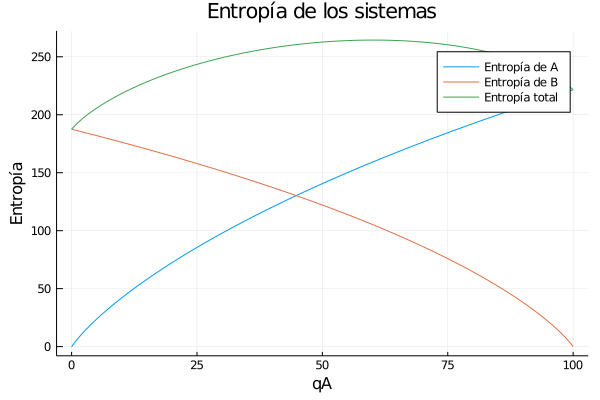

In [26]:
plot(title="Entropía de los sistemas", ylabel="Entropía",xlabel="qA")
plot!(qA,SA,label="Entropía de A")
plot!(qA,SB, label="Entropía de B")
plot!(qA,S_total,label="Entropía total")